# Parallel Coordiantes - 1

- testing plotly

In [7]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

bostondata = pd.DataFrame(boston.data, columns=boston.feature_names)
bostondata.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
dfo = pd.read_csv('data/iris.csv')
dfo.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


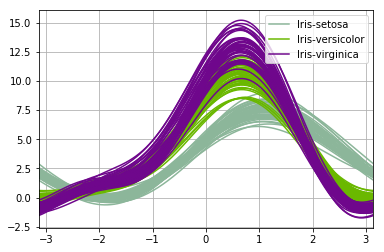

In [17]:
andrews_curves(dfo, 'Name');

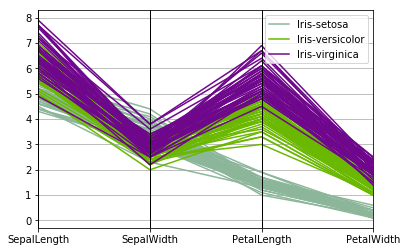

In [18]:
parallel_coordinates(dfo, 'Name');

## plotly - external plot

In [19]:
import plotly
plotly.__version__

import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from plotly.offline import plot #python package for semi interactive plots and HTML format
from plotly import tools #python package for semi interactive plots and HTML format
import plotly.graph_objs as go #python package for semi interactive plots and HTML format

plotly.offline.init_notebook_mode(connected=True)

In [20]:
#plot([go.Scatter(x=[1, 2, 3], y=[3, 1, 6])])

## plotly - in same notbook

In [23]:
init_notebook_mode(connected=True)
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [24]:
plotly.offline.iplot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
})

In [25]:
import plotly.graph_objs as go

import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

In [26]:
dfo.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data = dfo.copy()

print(data['Name'].value_counts())
color_dict = {'Iris-setosa': 1,
              'Iris-versicolor': 2,
              'Iris-virginica': 3}

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Name, dtype: int64


In [28]:
data['id'] = data['Name'].replace(color_dict)

In [29]:
data['id'].value_counts()

3    50
2    50
1    50
Name: id, dtype: int64

#### colorscale
default: (not interesting)  
Sets the colorscale. Has an effect only if in `line.color`is set to a numerical array. The colorscale must be an array containing arrays mapping a normalized value to an rgb, rgba, hex, hsl, hsv, or named color string. At minimum, a mapping for the lowest (0) and highest (1) values are required. For example, `[[0, 'rgb(0,0,255)', [1, 'rgb(255,0,0)']]`. To control the bounds of the colorscale in color space, use`line.cmin` and `line.cmax`.  
  
Alternatively, `colorscale` may be a palette name string of the following list: Greys,YlGnBu,Greens,YlOrRd,Bluered,RdBu,Reds,Blues,Picnic,Rainbow,Portland,Jet,Hot,Blackbody,Earth,Electric,Viridis,Cividis. 

In [64]:
dfdict = [
    go.Parcoords(
        line = dict(color = data['id'],
                   colorscale = 'Cividis'#[[0,'#D7C16B'],[0.5,'#23D8C3'],[1,'blue']]  # 1: #F3F10F
                   ),
        dimensions = list([
            dict(range = [0,8],
                constraintrange = [4,8],
                label = 'Sepal Length', values = data['SepalLength']),
            dict(range = [0,8],
                label = 'Sepal Width', values = data['SepalWidth']),
            dict(range = [0,8],
                label = 'Petal Length', values = data['PetalLength']),
            dict(range = [0,8],
                label = 'Petal Width', values = data['PetalWidth'])
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = 'blue',        # #e5e5e5 Color Hex Gray90
    paper_bgcolor = 'blue'
)

# https://plot.ly/pandas/parallel-coordinates-plot/

fig = go.Figure(data = dfdict)  #, layout = layout)
iplot(fig, filename = 'parcoords-basic')

plotly.offline.plot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
})

In [ ]:


data = [
    go.Parcoords(
        line = dict(color = 'blue'),
        dimensions = list([
            dict(range = [1,5],
                 constraintrange = [1,2],
                 label = 'A', values = [1,4]),
            dict(range = [1.5,5],
                 tickvals = [1.5,3,4.5],
                 label = 'B', values = [3,1.5]),
            dict(range = [1,5],
                 tickvals = [1,2,4,5],
                 label = 'C', values = [2,4],
                 ticktext = ['text 1', 'text 2', 'text 3', 'text 4']),
            dict(range = [1,5],
                 label = 'D', values = [4,2])
        ])
    )
]

In [ ]:
iplot(data, filename='my-graph.html');

In [ ]:



x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

In [ ]:
dfo.head()

In [ ]:
dfo.plot.hexbin(x='SepalLength', y='SepalWidth', C='PetalWidth', reduce_C_function=np.max, gridsize=25);

In [ ]:
dfo.plot.hexbin(x='SepalLength', y='SepalWidth', C='PetalWidth', reduce_C_function=np.mean, gridsize=10);

In [ ]:
dfo.plot.scatter(x='SepalLength', y='SepalWidth', c='PetalWidth', s=50);

In [ ]:
ax = dfo.plot.scatter(x='SepalLength', y='SepalWidth', color='DarkBlue', label='Group 1');

dfo.plot.scatter(x='SepalLength', y='PetalLength', color='DarkGreen', label='Group 2', ax=ax);  # (!!) not same columns
# you have to separate the data frames...or subsett them